In [1]:
import numpy as np
import matplotlib.pyplot as plt

from shnitsel.dynamic import (
    postprocess as P,
    xrhelpers as xh,
    pca_biplot as pb,
)
from shnitsel.dynamic.plot import dihedral_kde as dk

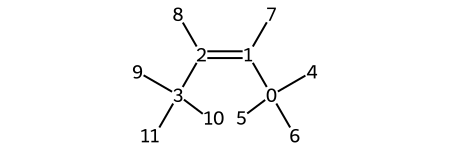

In [2]:
butene = xh.get_frames('/nc/Theo_SHNITSEL/filtered/traj_C4H8_filtered.nc')
pb.show_atom_numbers(butene.atXYZ.isel(frame=0))

So we want the dihedral angle between planes 0-1-2 and 1-2-3.

In [3]:
P.dihedral(butene.atXYZ, 0, 1, 2, 3)

<xarray.DataArray 'atXYZ' (frame: 18833)> Size: 151kB
array([0.03159385, 0.02827137, 0.02495056, ..., 2.37103771, 2.37176175,
       2.36994913])
Coordinates:
    atNames  <U1 4B 'C'
  * frame    (frame) object 151kB MultiIndex
  * trajid   (frame) int64 151kB 57 57 57 57 57 57 ... 270 270 270 270 270 270
  * time     (frame) float64 151kB 0.0 0.5 1.0 1.5 ... 148.5 149.0 149.5 150.0

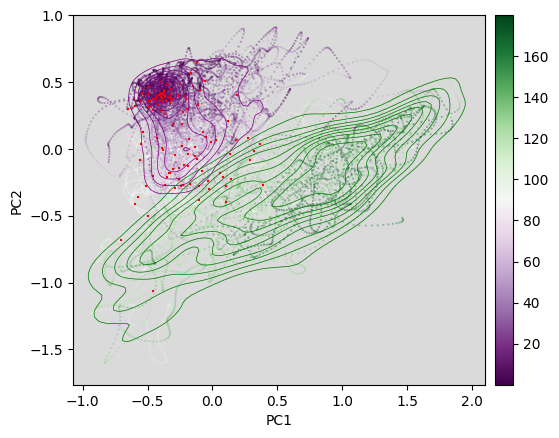

In [4]:
def figax(ax=None):
    if ax is None:
        return plt.subplots(1, 1)
    else:
        return ax.figure, ax

def plot_noodle_dihedral(noodle, hops, dihedrals, ax=None):
    return pb.plot_noodleplot(
        noodle, hops, c=dihedrals, cmap='PRGn', hops_kws=dict(c='r', marker='+', s=2), ax=ax)

def calc_and_plot(frames, i, j, k, l, ax=None):
    fig, ax = figax(ax)
    noodle, hops = P.pca_and_hops(frames)
    dihedrals = P.dihedral(frames['atXYZ'], i, j, k, l) * 180 / np.pi
    ax = plot_noodle_dihedral(noodle, hops, dihedrals, ax=ax)

kde_data = dk.fit_and_eval_kdes(butene, fineness=100)
dk.plot_kdes(*kde_data, levels=10)
calc_and_plot(butene, 0, 1, 2, 3, ax=plt.gca())

sweeping clock from -30°
swept to -110°
sweeping anti from 30°
swept to 60°


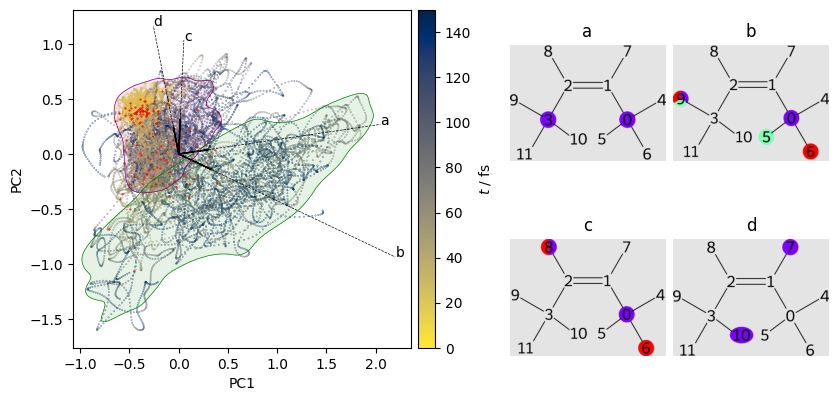

In [5]:
kde_data = dk.biplot_dihedral_time(frames=butene)

cis   99.51801949830144 %
trans 98.8170563961475 %


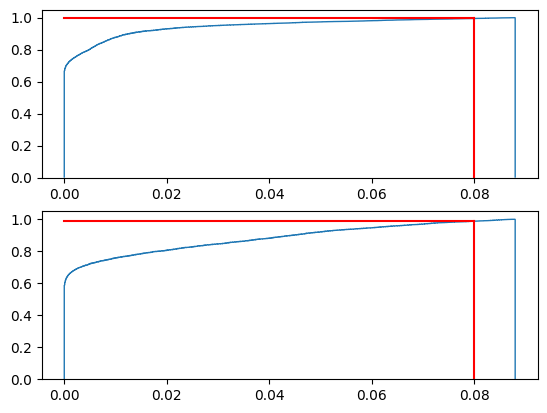

In [8]:
fig, axs = plt.subplots(2,1)
Zcis, Ztrans = kde_data[2:]
print('cis  ', dk.plot_cdf_for_kde(Zcis.ravel(), 0.08, ax=axs[0])*100, '%')
print('trans', dk.plot_cdf_for_kde(Ztrans.ravel(), 0.08, ax=axs[1])*100, '%')